#Expolratory Data Analysis
Employee Attrition Analysis

In [2]:
import pandas as pd
import numpy as np

# Initial exploration

In [5]:
df=pd.read_csv('/content/WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
df.shape

(1470, 35)

The dataset contains 1,470 records with 35 features.
The target variable is Attrition, which indicates whether an employee has left the company (Yes) or not (No).

In [ ]:
print(df.nunique())

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBalance                4
YearsAtCompany                37
YearsInCurrentRole            19
YearsSinceLastPromotion       16
YearsWithC

#Data Cleaning

In [ ]:
# Dropping columns with no predictive power
df = df.drop(['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber'], axis=1)

# Converting categorical variables to numerical
cat_cols = df.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

# Check class imbalance
print("\nAttrition distribution:\n", df['Attrition'].value_counts())


Attrition distribution:
 Attrition
0    1233
1     237
Name: count, dtype: int64


#visualizing the relationships between features and attrition:

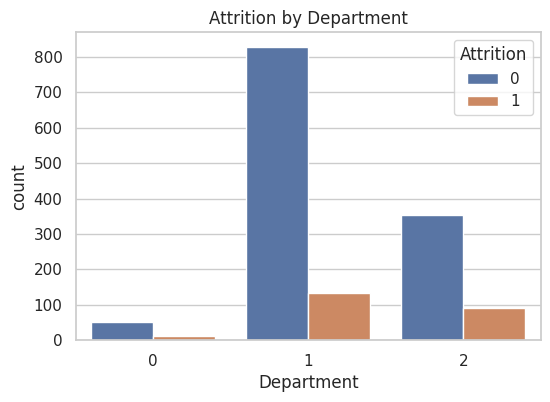

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Plot attrition by department
plt.figure(figsize=(6,4))
sns.countplot(x='Department', hue='Attrition', data=df)
plt.title('Attrition by Department')
plt.show()

Shows how many employees stayed or left in each department.

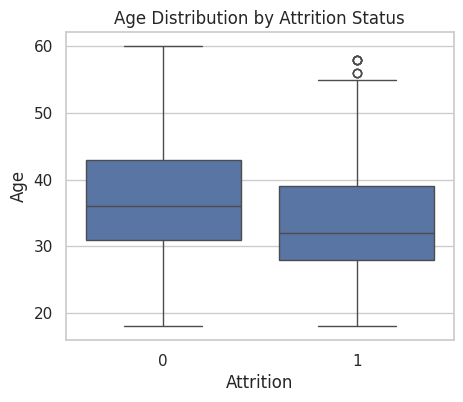

In [ ]:
# Age distribution by attrition
plt.figure(figsize=(5,4))
sns.boxplot(x='Attrition', y='Age', data=df)
plt.title('Age Distribution by Attrition Status')
plt.show()

Illustrates age spread among employees who stayed vs those who left. Generally, younger employees tend to leave more often.

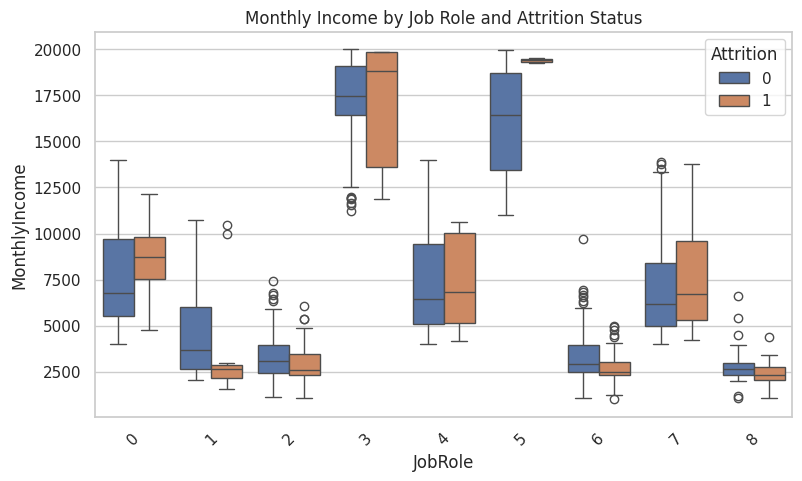

In [ ]:
# Monthly income by job role and attrition
plt.figure(figsize=(9,5))
sns.boxplot(x='JobRole', y='MonthlyIncome', hue='Attrition', data=df)
plt.xticks(rotation=45)
plt.title('Monthly Income by Job Role and Attrition Status')
plt.show()

Highlights income disparities across job roles and how income relates to attrition. Employees in lower-paying roles show higher attrition.

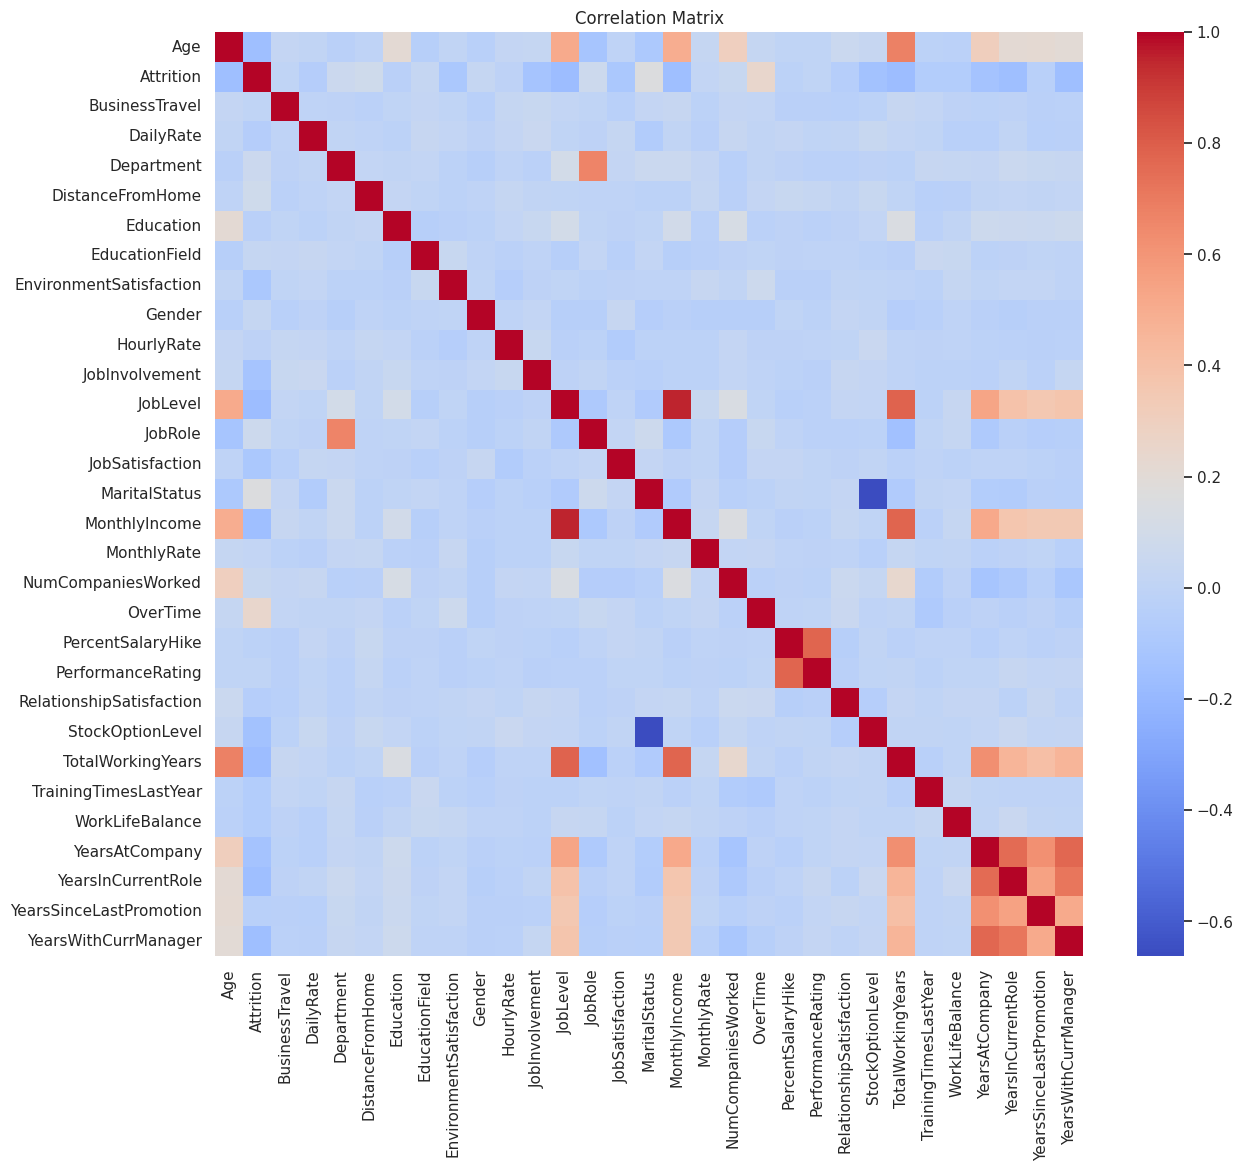

In [ ]:
# Correlation matrix
plt.figure(figsize=(14,12))
corr = df.corr()
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Displays relationships among numerical features. Strong correlations are seen between variables like Monthly Income and Job Level.

#Feature Engineering and Selection

In [ ]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [ ]:
# Calculate correlation with target
corr_with_target = df.corr()['Attrition'].sort_values(ascending=False)
print("\nCorrelation with Attrition:\n", corr_with_target)

# Select important features based on correlation and domain knowledge
selected_features = ['Age', 'DailyRate', 'DistanceFromHome', 'EnvironmentSatisfaction',
                    'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
                    'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
                    'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
                    'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
                    'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
                    'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']

# Prepare data for modeling
X = df[selected_features]
y = df['Attrition']


Correlation with Attrition:
 Attrition                   1.000000
OverTime                    0.246118
MaritalStatus               0.162070
DistanceFromHome            0.077924
JobRole                     0.067151
Department                  0.063991
NumCompaniesWorked          0.043494
Gender                      0.029453
EducationField              0.026846
MonthlyRate                 0.015170
PerformanceRating           0.002889
BusinessTravel              0.000074
HourlyRate                 -0.006846
PercentSalaryHike          -0.013478
Education                  -0.031373
YearsSinceLastPromotion    -0.033019
RelationshipSatisfaction   -0.045872
DailyRate                  -0.056652
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
EnvironmentSatisfaction    -0.103369
JobSatisfaction            -0.103481
JobInvolvement             -0.130016
YearsAtCompany             -0.134392
StockOptionLevel           -0.137145
YearsWithCurrManager       -0.156199
Age     

In [ ]:
from imblearn.over_sampling import SMOTE

# Handle class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

In [ ]:
from sklearn.model_selection import train_test_split

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
# Scale numerical features
scaler = StandardScaler()
num_cols = ['Age', 'DailyRate', 'DistanceFromHome', 'MonthlyIncome', 'NumCompaniesWorked',
            'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear',
            'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
            'YearsWithCurrManager']

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

# Model Building and Evaluation

**Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Evaluate the model
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nAccuracy:", accuracy_score(y_test, y_pred))

# Feature importance
feature_importance = pd.DataFrame({'Feature': selected_features,
                                  'Importance': rf.feature_importances_}).sort_values('Importance', ascending=False)
print("\nFeature Importance:\n", feature_importance)


Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.91      0.90       369
           1       0.91      0.87      0.89       371

    accuracy                           0.89       740
   macro avg       0.89      0.89      0.89       740
weighted avg       0.89      0.89      0.89       740


Confusion Matrix:
 [[337  32]
 [ 47 324]]

Accuracy: 0.8932432432432432

Feature Importance:
                      Feature  Importance
12          StockOptionLevel    0.106314
7              MonthlyIncome    0.088038
4             JobInvolvement    0.056382
6            JobSatisfaction    0.055194
3    EnvironmentSatisfaction    0.055189
2           DistanceFromHome    0.047643
13         TotalWorkingYears    0.046428
1                  DailyRate    0.046144
0                        Age    0.044474
19      YearsWithCurrManager    0.041727
11  RelationshipSatisfaction    0.041709
15           WorkLifeBalance    0.038517
16            YearsA

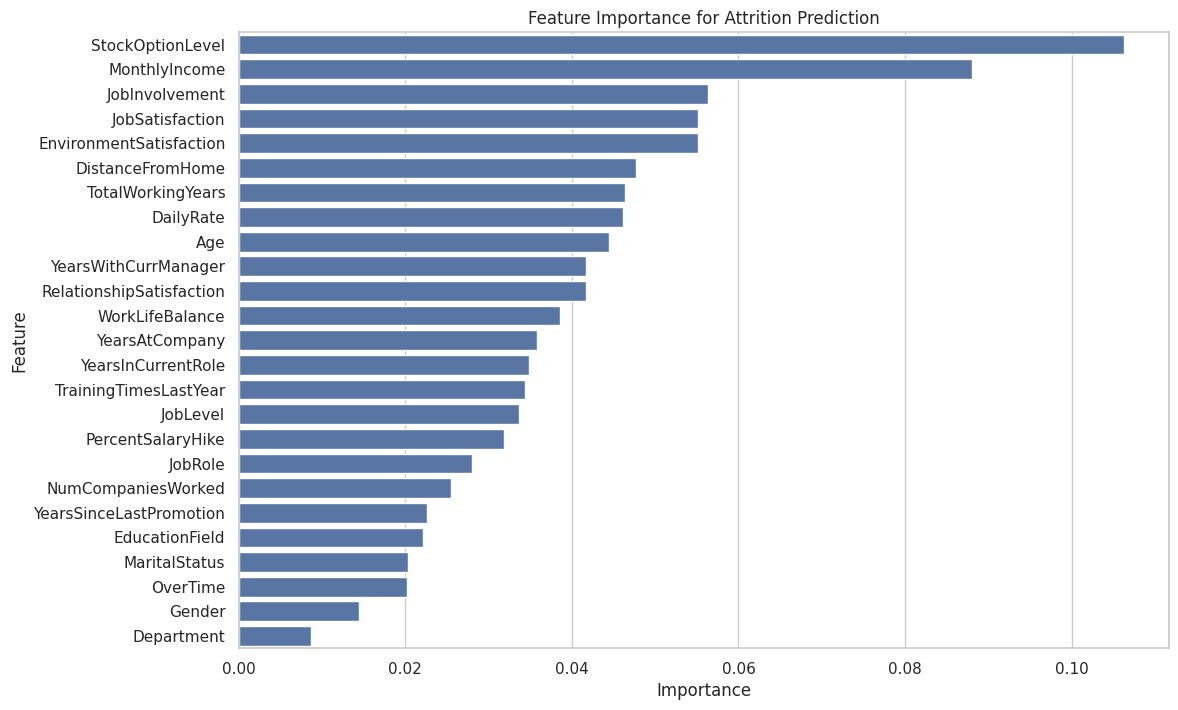

In [ ]:
# Plot feature importance
plt.figure(figsize=(12,8))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance for Attrition Prediction')
plt.show()

# Key Findings and Insights Based on the analysis:

**Top Factors Influencing Attrition:**

**OverTime:** Employees working overtime are much more likely to leave

**MonthlyIncome:** Lower income correlates with higher attrition

**Age:** Younger employees are more likely to leave

**StockOptionLevel:** Employees with fewer stock options leave more often

**JobSatisfaction:** Lower satisfaction leads to higher attrition

**YearsAtCompany:** Employees with fewer years at company are more likely to leave

**Department Impact:** Sales department shows higher attrition rates compared to R&D

**Job Role Impact:** Sales Representatives and Laboratory Technicians show higher attrition

Managers and Research Directors have lower attrition

**Work-Life Balance:** Employees reporting poor work-life balance have higher attrition